# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb


# Main

In [3]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


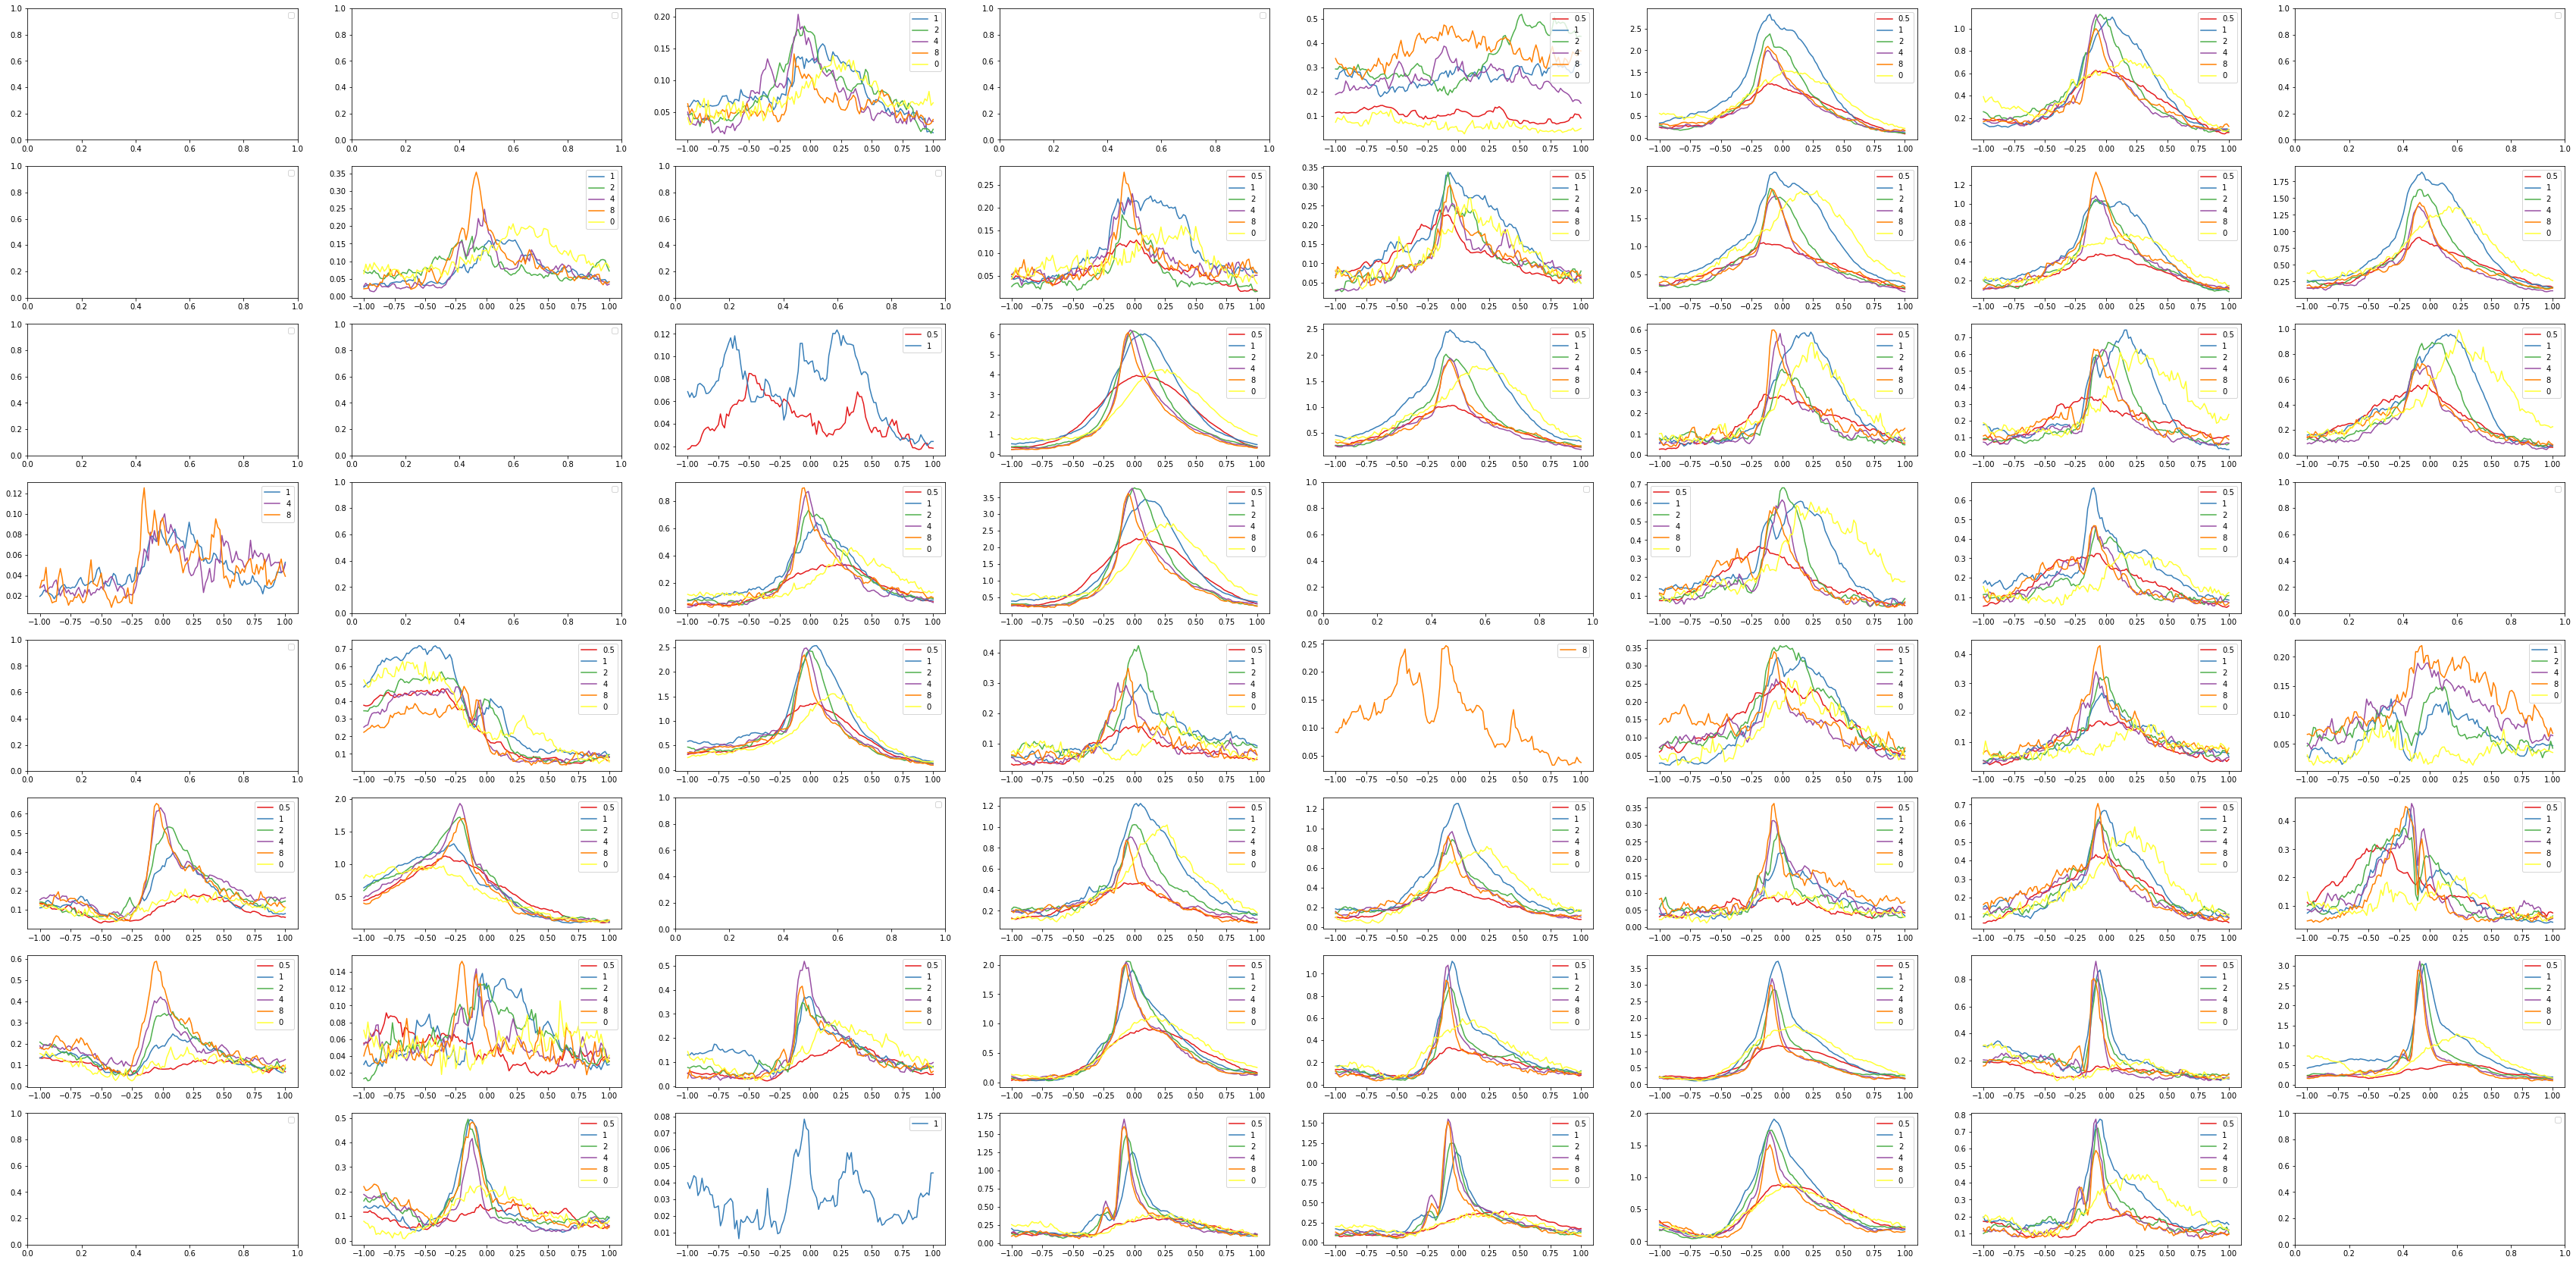

In [4]:
import warnings
warnings.simplefilter('ignore')
MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
cmind = 0
for Fc in [0.5,1,2,4,8,0]: 
    exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\MB\\'
    filename = 'merge_0727_OUsmooth_Bright_RL_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz'
    annots = loadmat(exp_folder+'merge\\'+filename)
    x = np.squeeze(annots['bin_pos'])
    x = x.astype(float)
    x = (x-np.mean(x))/np.std(x)
    dt = 1./60.
    T=np.arange(len(x))*dt+dt
    v = ndimage.gaussian_filter1d(x.copy(), sigma=5, order=1, mode='reflect')/dt

    xstate, _= EqualState(x, 6)
    vstate, _= EqualState(v, 6)
    PIfig, PIax = plt.subplots(nrows=8, ncols=8)
    MIfig, MIax = plt.subplots(nrows=8, ncols=8)
    Information_cell = [0]*60
    for channelnumber in np.arange(1,61):
        rstate, _ = np.histogram(annots['reconstruct_spikes'][0][channelnumber-1], np.append(0,T))
        if sum(rstate)/len(rstate)/dt <= 0.3 : continue

        window = [-1,1] # second
        timeshift, Information = PIfunc(rstate, xstate, vstate, dt, window)
        Information_cell[channelnumber-1] = Information.copy()
        if max(Information[('Beer','UIx')]) < 0.05: continue
        PIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIx')],'r-')
        PIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIv')],'b-')
        PIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','Syn')],'k-')
        PIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','Red')],'g-')
        PIax[np.where(figmap == channelnumber)][0].set_title(str(channelnumber))
        PIax[np.where(figmap == channelnumber)][0].grid()

        MIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')],'r-')
        MIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIv')]+Information[('Beer','Red')],'b-')
        MIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIv')]+Information[('Beer','UIx')]
                                                        +2*Information[('Beer','Red')],'m-')
        MIax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIv')]+Information[('Beer','UIx')]
                                                        +Information[('Beer','Red')]+Information[('Beer','Syn')],'k-')
        MIax[np.where(figmap == channelnumber)][0].set_title(str(channelnumber))
        MIax[np.where(figmap == channelnumber)][0].grid()
        
        MIdFcax[np.where(figmap == channelnumber)][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')]
                                                           , label=str(Fc), color = plt.cm.Set1(cmind))
    cmind += 1
    PIfig.set_size_inches(60, 30)
    PIfig.savefig(exp_folder+'MI\\Fig\\PI_'+filename+'.tif', bbox_inches = 'tight',pad_inches = 0.3)
    plt.close(PIfig)
    MIfig.set_size_inches(60, 30)
    MIfig.savefig(exp_folder+'MI\\Fig\\MI_'+filename+'.tif', bbox_inches = 'tight',pad_inches = 0.3)
    plt.close(MIfig)
    np.savez(exp_folder+'MI\\MI_'+filename+'.npz', Information_cell = Information_cell, timeshift = timeshift)
    
for ax1d in MIdFcax:
    for ax in ax1d:
        ax.legend()
MIdFcfig.set_size_inches(60, 30)
MIdFcfig.savefig(exp_folder+'MI\\Fig\\dFc_MIx_BB.tif', bbox_inches = 'tight',pad_inches = 0.3)

In [5]:
# MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
# for Fc in [0.5,1,2,4,8,0]:
#     exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\MB\\'
#     filename = 'merge_0727_OUsmooth_Bright_RL_G4.5_5min_Q100_6.5mW_'+str(Fc)+'Hz'
#     loadfiles = np.load(exp_folder+'MI\\MI_'+filename+'.npz', allow_pickle=True)
#     for k in loadfiles.files:
#         vars()[k] = loadfiles[k][()]
    
#     for k in InformationCollection.keys():
#         Information = InformationCollection[k[0],k[1]]
#         MIdFcax[np.where(figmap == float(k[0]))][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')], label=k[1])

# for ax1d in MIdFcax:
#     for ax in ax1d:
#         ax.legend()
# MIdFcfig.set_size_inches(60, 30)

In [6]:
# MIdFcfig.savefig(exp_folder+'MI\\Fig\\test.tif', bbox_inches = 'tight',pad_inches = 0.3)